In [112]:
import mysql.connector
from mysql.connector import Error

import pandas as pd
import pandas_profiling

import datetime

import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

from googletrans import Translator

In [2]:
MYSQL_USER = MYSQL_PWD = "student"
MYSQL_HOST = "cpanel.insaid.co"
MYSQL_DB = "Capstone1"

In [3]:
def connect_db():
    return mysql.connector.connect(
        host=MYSQL_HOST,
        user=MYSQL_USER,
        passwd=MYSQL_PWD,
        database=MYSQL_DB,
        connect_timeout=1000000,
        buffered=True
    )

In [4]:
def execute_query(query, connection):
    df = pd.read_sql(query, con = connection)
    return df

In [5]:
def get_data(query):
    df = pd.DataFrame()
    try:
        db_connection = connect_db()
        cursor = db_connection.cursor(buffered=True)
    
        if db_connection.is_connected():
            df = execute_query(query, db_connection)
    
    except Error as e:
        print("Error while connecting to MySQL", e)
        print("Error code:", e.errno)
        print("Error message:", e.msg)
    finally:
        if (db_connection.is_connected()):
            cursor.close()
            db_connection.close()
            print("MySQL connection is closed")
    
    return df

In [11]:
event_data_query_mp = "SELECT event_id, CAST(device_Id AS CHAR) AS device_id, timestamp, longitude, latitude, city, state FROM events_data where state in ('MadhyaPradesh') " 
df_event_data_mp = get_data(event_data_query_mp)
df_event_data_mp.head()

MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,10117,-5323073305882503557,2016-05-01 11:11:24,75.939545,22.769171,Indore,MadhyaPradesh
1,112369,-5323073305882503557,2016-05-04 22:47:19,75.939545,22.769171,Indore,MadhyaPradesh
2,139098,-5323073305882503557,2016-05-01 09:55:58,75.939545,22.769171,Indore,MadhyaPradesh
3,190983,-5323073305882503557,2016-05-04 22:51:03,75.939545,22.769171,Indore,MadhyaPradesh
4,249507,-5323073305882503557,2016-05-01 11:24:12,75.939545,22.769171,Indore,MadhyaPradesh


In [13]:
event_data_query_other = "SELECT event_id, CAST(device_Id AS CHAR) AS device_id, timestamp, longitude, latitude, city, state FROM events_data where state in ('Chhattisgarh', 'Uttaranchal', 'JammuandKashmir', 'JammuandKashmir', 'Goa', 'Nagaland') " #where state in ('MadhyaPradesh')
df_event_data_other = get_data(event_data_query_other)
df_event_data_other.head()

MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,20984,-6751207669980900563,2016-05-06 18:23:03,73.973602,15.317287,Madgaon,Goa
1,33979,-6751207669980900563,2016-05-04 06:02:36,73.973602,15.317287,Madgaon,Goa
2,104768,-6751207669980900563,2016-05-07 15:11:31,73.973602,15.317287,Madgaon,Goa
3,135615,-6751207669980900563,2016-05-07 15:10:31,73.973602,15.317287,Madgaon,Goa
4,420749,-6751207669980900563,2016-05-07 15:12:39,73.973602,15.317287,Madgaon,Goa


In [14]:
df_event_data = pd.concat([df_event_data_mp, df_event_data_other])
df_event_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,10117,-5323073305882503557,2016-05-01 11:11:24,75.939545,22.769171,Indore,MadhyaPradesh
1,112369,-5323073305882503557,2016-05-04 22:47:19,75.939545,22.769171,Indore,MadhyaPradesh
2,139098,-5323073305882503557,2016-05-01 09:55:58,75.939545,22.769171,Indore,MadhyaPradesh
3,190983,-5323073305882503557,2016-05-04 22:51:03,75.939545,22.769171,Indore,MadhyaPradesh
4,249507,-5323073305882503557,2016-05-01 11:24:12,75.939545,22.769171,Indore,MadhyaPradesh


In [15]:
export_csv = df_event_data.to_csv (r'events_data_1026.csv', index = None, header=True)

In [17]:
gender_age_train_query = "SELECT CAST(device_Id AS CHAR) AS device_id, gender, age, `group` FROM gender_age_train WHERE device_id IN (SELECT DISTINCT device_id from events_data where state in ('MadhyaPradesh', 'Chhattisgarh', 'Uttaranchal', 'JammuandKashmir', 'JammuandKashmir', 'Goa', 'Nagaland')) "
df_gender_age_train = get_data(gender_age_train_query)
df_gender_age_train

MySQL connection is closed


,device_id,gender,age,group
0,2313145512701915151,M,34,M32-38
1,-1539979963116391306,M,31,M29-31
2,-7731743086143077949,M,35,M32-38
3,-4370696809239943432,M,36,M32-38
4,2959524852145775517,M,30,M29-31
...,...,...,...,...
4292,-4920908366861118993,M,28,M27-28
4293,7415779204063920924,M,43,M39+
4294,5248842452114192734,M,28,M27-28
4295,7713308859694505501,M,26,M23-26


In [18]:
phone_brand_device_modal_query = "SELECT CAST(device_Id AS CHAR) AS device_id, phone_brand, device_model FROM phone_brand_device_model WHERE device_id IN (SELECT DISTINCT device_id from events_data where state in ('MadhyaPradesh', 'Chhattisgarh', 'Uttaranchal', 'JammuandKashmir', 'JammuandKashmir', 'Goa', 'Nagaland')) "
df_phone_brand_device_modal = get_data(phone_brand_device_modal_query)
df_phone_brand_device_modal

MySQL connection is closed


,device_id,phone_brand,device_model
0,2313145512701915151,vivo,Xplay
1,-1539979963116391306,小米,GN708W
2,-7731743086143077949,小米,红米
3,-4370696809239943432,小米,MI 2S
4,2959524852145775517,三星,A850
...,...,...,...
4292,5729536557363990271,魅族,MX4 Pro
4293,-8521310916701367629,小米,MI 2S
4294,4008992282604541722,小米,红米note
4295,-8513863533705424532,魅族,MX3


In [19]:
export_csv1 = df_gender_age_train.to_csv (r'gender_age_1026.csv', index = None, header=True)
export_csv2 = df_phone_brand_device_modal.to_csv (r'phone_brand_1026.csv', index = None, header=True)

In [20]:
df_gender_age_train['age'].unique()

array([34, 31, 35, 36, 30, 41, 23, 28, 46, 24, 22, 27, 59, 47, 67, 26, 39,
       29, 25, 60, 38, 37, 20, 45, 42, 53, 17, 21, 40, 32, 33, 52, 49, 63,
       54, 19, 44, 50, 75, 57, 43, 68, 62, 56, 64, 51, 48, 61, 90, 55, 71,
       18, 58, 66, 83, 16, 10, 72, 69, 78, 15, 70, 79, 74, 11, 14,  6, 12],
      dtype=int64)

In [21]:
df_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  4297 non-null   object
 1   gender     4297 non-null   object
 2   age        4297 non-null   int64 
 3   group      4297 non-null   object
dtypes: int64(1), object(3)
memory usage: 134.4+ KB


In [22]:
df_gender_age_train.describe()

,age
count,4297.000000
mean,30.922039
std,9.674628
min,6.000000
25%,24.000000
50%,29.000000
75%,35.000000
max,90.000000


In [23]:
df_gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [35]:
filename = "gender_age_train_" + datetime.datetime.now().strftime('%Y-%m-%d_%H:%M:%S') + ".html"
print("FileName - " + filename)

profile = pandas_profiling.ProfileReport(df_gender_age_train)
profile.to_file(outputfile="gender_age_train.html")

FileName - gender_age_train_2020-02-21_17:25:10.html


TypeError: concat() got an unexpected keyword argument 'join_axes'

In [36]:
df_by_group = df_gender_age_train.groupby('group')
df_by_group

In [38]:
df_by_group.describe()

age                                                   
        count       mean       std   min   25%   50%   75%   max
group                                                           
F23-    337.0  21.080119  1.781884  11.0  20.0  21.0  22.0  23.0
F24-26  240.0  25.012500  0.805220  24.0  24.0  25.0  26.0  26.0
F27-28  168.0  27.404762  0.492313  27.0  27.0  27.0  28.0  28.0
F29-32  299.0  30.150502  1.111604  29.0  29.0  30.0  31.0  32.0
F33-42  306.0  36.833333  2.864423  33.0  34.0  36.0  39.0  42.0
F43+    245.0  51.902041  7.529083  43.0  46.0  50.0  56.0  78.0
M22-    449.0  20.126949  1.857516   6.0  19.0  20.0  22.0  22.0
M23-26  578.0  24.619377  1.095337  23.0  24.0  25.0  26.0  26.0
M27-28  324.0  27.475309  0.500162  27.0  27.0  27.0  28.0  28.0
M29-31  388.0  29.912371  0.785891  29.0  29.0  30.0  31.0  31.0
M32-38  548.0  34.474453  1.912454  32.0  33.0  34.0  36.0  38.0
M39+    415.0  46.968675  7.686269  39.0  41.0  45.0  51.0  90.0

In [39]:
df_by_group_1 = df_by_group.median()
df_by_group_1.head()

,age
group,
F23-,21
F24-26,25
F27-28,27
F29-32,30
F33-42,36


In [61]:
list(df_by_group)[10]

('M32-38',
                  device_id gender  age   group
 0      2313145512701915151      M   34  M32-38
 2     -7731743086143077949      M   35  M32-38
 3     -4370696809239943432      M   36  M32-38
 13     3456872842738035793      M   34  M32-38
 35     4573555264680860597      M   38  M32-38
 ...                    ...    ...  ...     ...
 4279  -9022694801360330721      M   32  M32-38
 4284  -6262637487566461890      M   32  M32-38
 4285   8124996853194599319      M   32  M32-38
 4286  -3214120096224216596      M   34  M32-38
 4290   2527875100830457565      M   37  M32-38
 
 [548 rows x 4 columns])

In [62]:
group_age_dict = dict(tuple(df_by_group))
print (group_age_dict)

{'F23-':                  device_id gender  age group
6      6203757811505041868      F   23  F23-
65    -6883627633346026582      F   21  F23-
67     5621706890805001399      F   20  F23-
68     3548454186813732854      F   22  F23-
74     3773268016946133162      F   22  F23-
...                    ...    ...  ...   ...
4181   3225266468603606378      F   23  F23-
4217   -465104720331523382      F   18  F23-
4232  -4053138972145596711      F   22  F23-
4280  -5354206025519001252      F   21  F23-
4296  -2510601842775405069      F   22  F23-

[337 rows x 4 columns], 'F24-26':                  device_id gender  age   group
39    -6352016173918609049      F   24  F24-26
41     3307527014822292766      F   26  F24-26
50     8507377938081140935      F   24  F24-26
52     7344017656613380338      F   24  F24-26
60     2078044180018472445      F   26  F24-26
...                    ...    ...  ...     ...
4220   4115532983244256365      F   24  F24-26
4246  -7869015364904958299      F   24  

In [68]:
group_age_dict.get(df_by_group_1.index[0])

pandas.core.frame.DataFrame

In [42]:
print(df_by_group_1.index)

Index(['F23-', 'F24-26', 'F27-28', 'F29-32', 'F33-42', 'F43+', 'M22-',
       'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+'],
      dtype='object', name='group')


In [44]:
for name, group in df_by_group:
    print(name)
    print(group)

F23-
                 device_id gender  age group
6      6203757811505041868      F   23  F23-
65    -6883627633346026582      F   21  F23-
67     5621706890805001399      F   20  F23-
68     3548454186813732854      F   22  F23-
74     3773268016946133162      F   22  F23-
...                    ...    ...  ...   ...
4181   3225266468603606378      F   23  F23-
4217   -465104720331523382      F   18  F23-
4232  -4053138972145596711      F   22  F23-
4280  -5354206025519001252      F   21  F23-
4296  -2510601842775405069      F   22  F23-

[337 rows x 4 columns]
F24-26
                 device_id gender  age   group
39    -6352016173918609049      F   24  F24-26
41     3307527014822292766      F   26  F24-26
50     8507377938081140935      F   24  F24-26
52     7344017656613380338      F   24  F24-26
60     2078044180018472445      F   26  F24-26
...                    ...    ...  ...     ...
4220   4115532983244256365      F   24  F24-26
4246  -7869015364904958299      F   24  F24-26
4

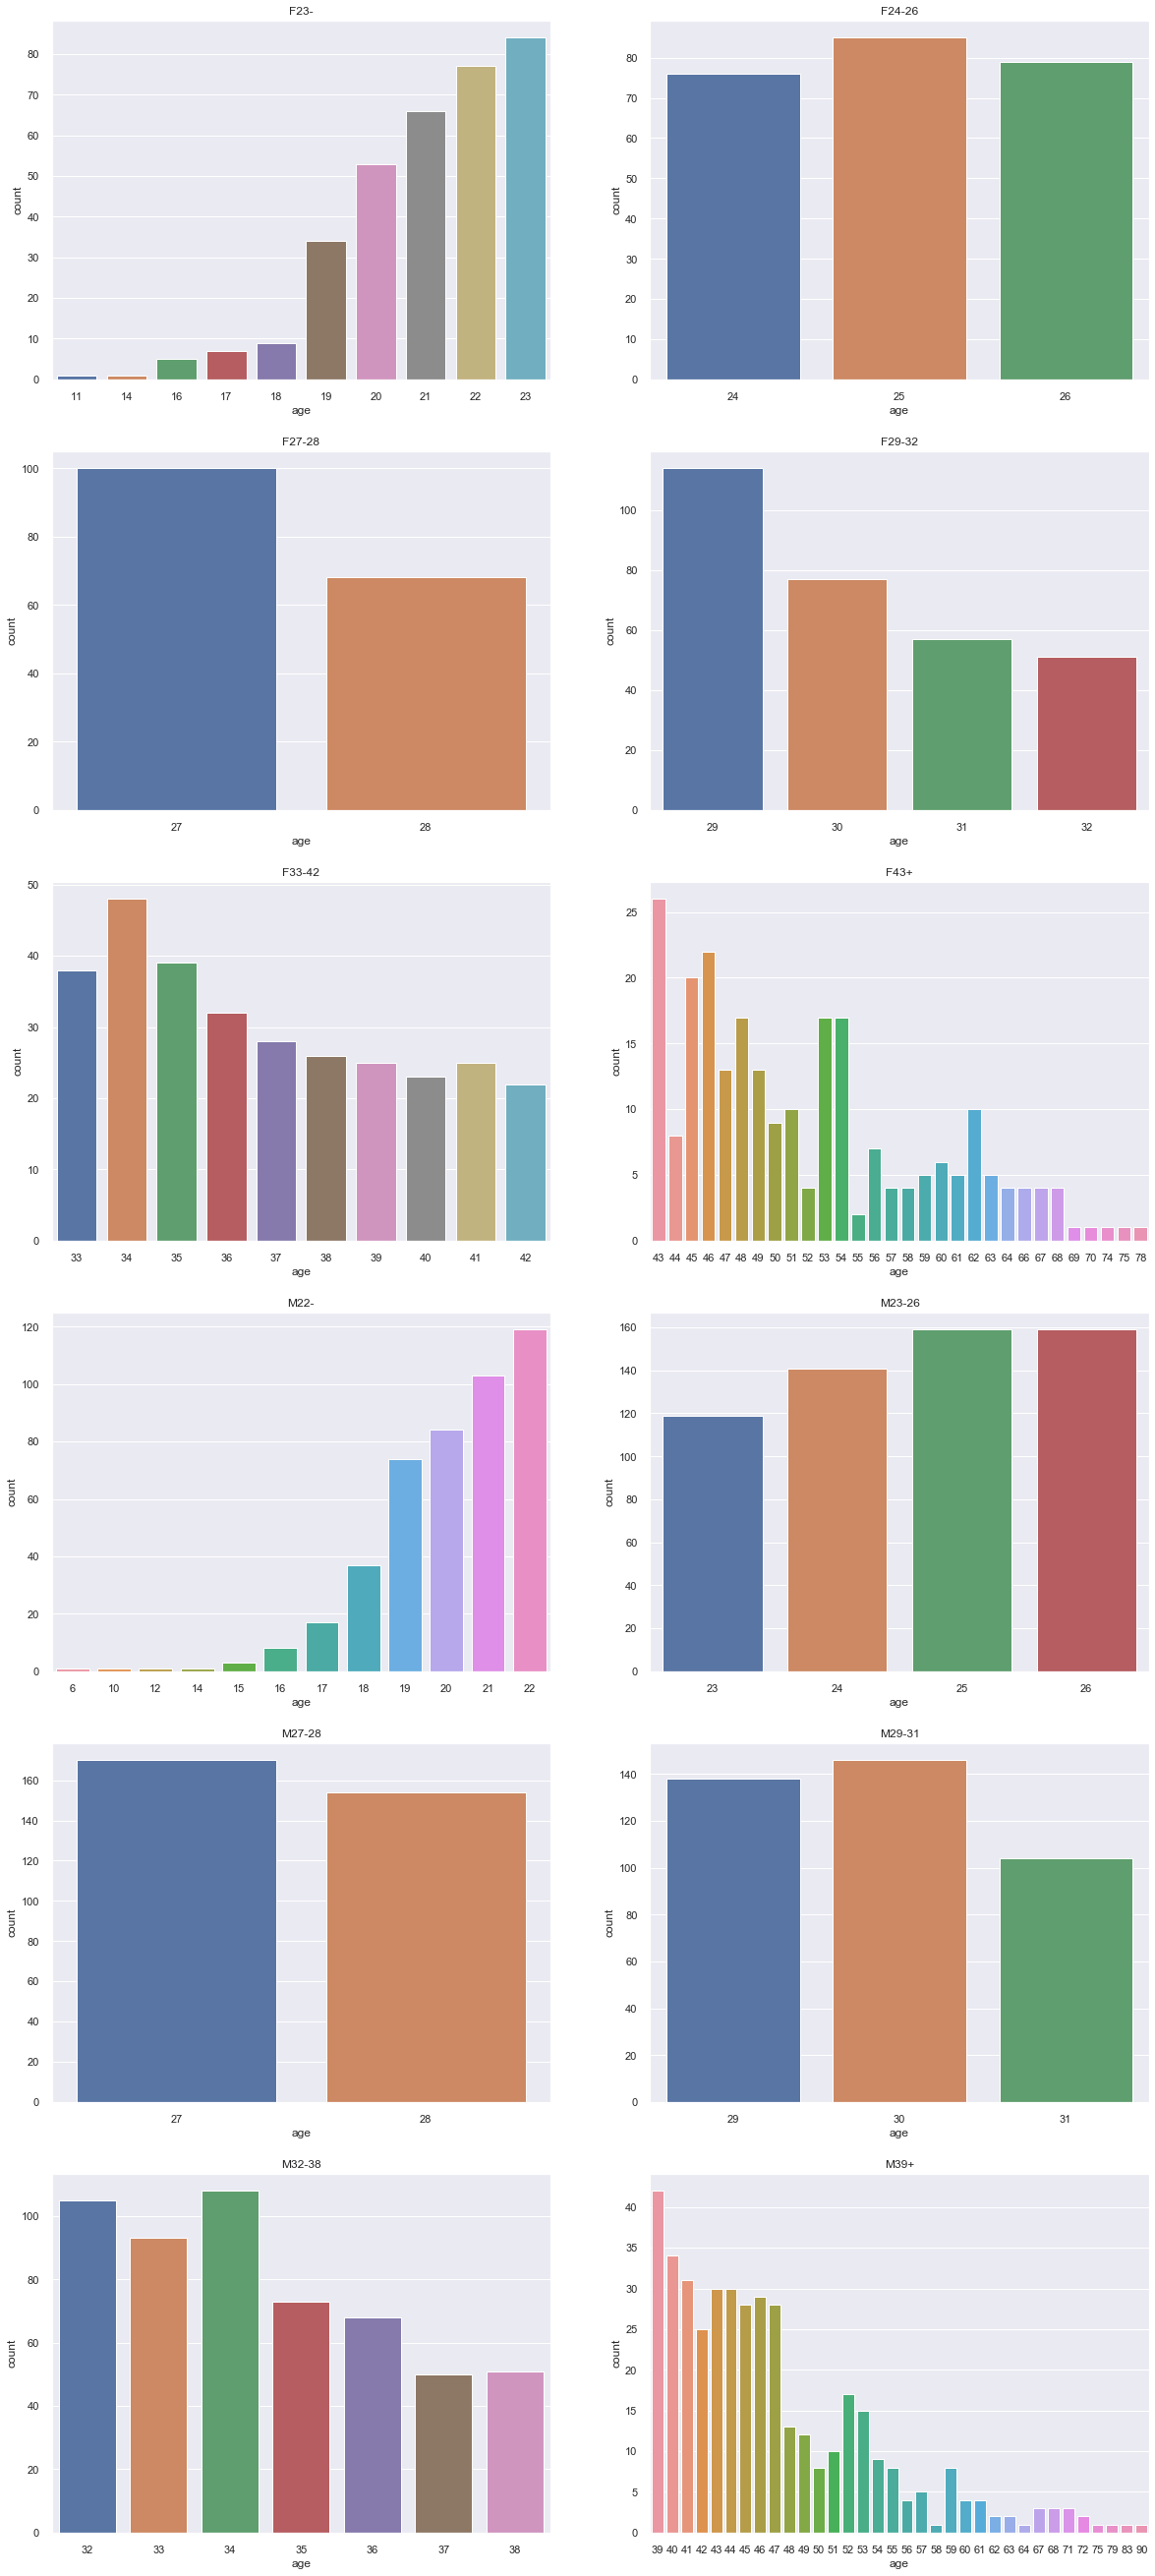

In [87]:
Tot = 12
Col = 2

Rows = Tot // Col 
Rows += Tot % Col

i=0

fig, axs = plt.subplots(Rows, Col, figsize=(20,47)) # adjust the geometry based on your number of columns to plot
for ax,col in zip(axs.flatten(), df_by_group_1.index):
    df = group_age_dict.get(df_by_group_1.index[i])
    sns.countplot(x="age", data=df, ax=ax).set_title(col)
    i=i+1

plt.show()

In [82]:
df_gender_age_train.groupby(['group'])['group'].count()

group
F23-      337
F24-26    240
F27-28    168
F29-32    299
F33-42    306
F43+      245
M22-      449
M23-26    578
M27-28    324
M29-31    388
M32-38    548
M39+      415
Name: group, dtype: int64

Text(0.5, 1.0, 'Count plot for group.')

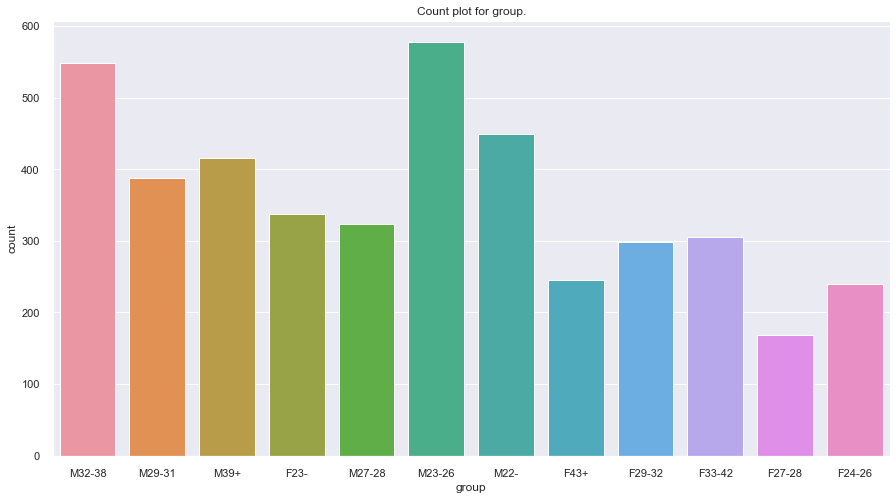

In [84]:
plt.figure(figsize=(15,8))
sns.countplot(x='group', data=df_gender_age_train).set_title('Count plot for group.')

In [88]:
df_gender_age_train.groupby(['gender'])['gender'].count()

gender
F    1595
M    2702
Name: gender, dtype: int64

In [89]:
df_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261097 entries, 0 to 28406
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   261097 non-null  int64         
 1   device_id  261046 non-null  object        
 2   timestamp  261097 non-null  datetime64[ns]
 3   longitude  261034 non-null  float64       
 4   latitude   261034 non-null  float64       
 5   city       261097 non-null  object        
 6   state      261097 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 15.9+ MB


In [90]:
df_event_data.describe()

,event_id,longitude,latitude
count,2.610970e+05,261034.000000,261034.000000
mean,1.625966e+06,76.704918,23.258085
std,9.401508e+05,2.333525,2.219976
min,1.011700e+04,12.567400,15.291265
25%,8.136240e+05,75.897141,22.750061
50%,1.624810e+06,75.925995,22.782286
75%,2.438915e+06,75.956451,22.811922
max,3.252939e+06,94.361549,41.871899


In [91]:
df_event_data.isnull().sum()

event_id      0
device_id    51
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [97]:
cols_to_check = ['longitude', 'latitude']
df_event_data['is_na'] = df_event_data[cols_to_check].isnull().apply(lambda x: all(x), axis=1) 
df_event_data[df_event_data['is_na'] == True]

,event_id,device_id,timestamp,longitude,latitude,city,state,is_na
11431,98473,2350979402202438478,2016-05-01 13:26:19,NaN,NaN,Indore,MadhyaPradesh,True
11489,306267,2350979402202438478,2016-05-04 12:28:22,NaN,NaN,Indore,MadhyaPradesh,True
11493,325499,2350979402202438478,2016-05-03 00:04:38,NaN,NaN,Indore,MadhyaPradesh,True
11560,548071,2350979402202438478,2016-05-03 10:15:01,NaN,NaN,Indore,MadhyaPradesh,True
11598,670642,2350979402202438478,2016-05-01 09:39:47,NaN,NaN,Indore,MadhyaPradesh,True
...,...,...,...,...,...,...,...,...
33862,2338442,3738280493453802895,2016-05-03 13:38:44,NaN,NaN,Indore,MadhyaPradesh,True
33904,2549252,3738280493453802895,2016-05-02 09:44:11,NaN,NaN,Indore,MadhyaPradesh,True
33968,2843278,3738280493453802895,2016-05-01 01:08:00,NaN,NaN,Indore,MadhyaPradesh,True
34024,3066955,3738280493453802895,2016-05-01 14:20:10,NaN,NaN,Indore,MadhyaPradesh,True


In [100]:
df_event_data[df_event_data['is_na'] == True]['device_id'].unique()

array(['2350979402202438478', '-8790560034584248901',
       '3738280493453802895'], dtype=object)

In [98]:
df_event_data[df_event_data['device_id'] == '2350979402202438478']

,event_id,device_id,timestamp,longitude,latitude,city,state,is_na
11399,10320,2350979402202438478,2016-05-02 11:41:22,75.888474,22.745064,Indore,MadhyaPradesh,False
11400,11363,2350979402202438478,2016-05-01 12:50:10,75.888474,22.745064,Indore,MadhyaPradesh,False
11401,11973,2350979402202438478,2016-05-04 12:10:32,75.888474,22.745064,Indore,MadhyaPradesh,False
11402,14729,2350979402202438478,2016-05-03 14:09:17,75.888474,22.745064,Indore,MadhyaPradesh,False
11403,16260,2350979402202438478,2016-05-03 15:34:15,75.888474,22.745064,Indore,MadhyaPradesh,False
...,...,...,...,...,...,...,...,...
12185,3233529,2350979402202438478,2016-05-02 12:04:29,75.888474,22.745064,Indore,MadhyaPradesh,False
12186,3237666,2350979402202438478,2016-05-01 15:28:37,75.888474,22.745064,Indore,MadhyaPradesh,False
12187,3239613,2350979402202438478,2016-05-03 16:43:46,75.888474,22.745064,Indore,MadhyaPradesh,False
12188,3242825,2350979402202438478,2016-05-02 18:13:15,75.888474,22.745064,Indore,MadhyaPradesh,False


In [101]:
df_event_data[df_event_data['device_id'].isin(df_event_data[df_event_data['is_na'] == True]['device_id'].unique())]

,event_id,device_id,timestamp,longitude,latitude,city,state,is_na
11399,10320,2350979402202438478,2016-05-02 11:41:22,75.888474,22.745064,Indore,MadhyaPradesh,False
11400,11363,2350979402202438478,2016-05-01 12:50:10,75.888474,22.745064,Indore,MadhyaPradesh,False
11401,11973,2350979402202438478,2016-05-04 12:10:32,75.888474,22.745064,Indore,MadhyaPradesh,False
11402,14729,2350979402202438478,2016-05-03 14:09:17,75.888474,22.745064,Indore,MadhyaPradesh,False
11403,16260,2350979402202438478,2016-05-03 15:34:15,75.888474,22.745064,Indore,MadhyaPradesh,False
...,...,...,...,...,...,...,...,...
34058,3228938,3738280493453802895,2016-05-05 09:46:44,75.937988,22.762011,Indore,MadhyaPradesh,False
34059,3237217,3738280493453802895,2016-05-05 14:38:52,75.937988,22.762011,Indore,MadhyaPradesh,False
34060,3242200,3738280493453802895,2016-05-07 17:46:07,75.937988,22.762011,Indore,MadhyaPradesh,False
34061,3246815,3738280493453802895,2016-05-04 20:00:45,75.937988,22.762011,Indore,MadhyaPradesh,False


In [103]:
df_event_data.groupby(['state', 'city'])['device_id'].count()

state         city       
Chhattisgarh  Ambikapur       539
              Bhilai          911
              Bilaspur       1145
              Charoda         645
              Chirmiri        816
                             ... 
Uttaranchal   Haridwar        427
              Kashipur       1711
              Pithoragarh     697
              Rishikesh       500
              Rurki          1274
Name: device_id, Length: 85, dtype: int64

In [104]:
df_event_data.groupby(['state'])['city'].count()

state
Chhattisgarh         9754
Goa                  3250
JammuandKashmir      5385
MadhyaPradesh      232690
Nagaland             2298
Uttaranchal          7720
Name: city, dtype: int64

In [106]:
df_merged_dataframe = pd.merge(left=df_gender_age_train, right=df_phone_brand_device_modal, left_on='device_id', right_on='device_id')
df_merged_dataframe

,device_id,gender,age,group,phone_brand,device_model
0,2313145512701915151,M,34,M32-38,vivo,Xplay
1,-1539979963116391306,M,31,M29-31,小米,GN708W
2,-7731743086143077949,M,35,M32-38,小米,红米
3,-4370696809239943432,M,36,M32-38,小米,MI 2S
4,2959524852145775517,M,30,M29-31,三星,A850
...,...,...,...,...,...,...
4292,-4920908366861118993,M,28,M27-28,三星,Galaxy Trend 2
4293,7415779204063920924,M,43,M39+,三星,A766
4294,5248842452114192734,M,28,M27-28,小米,MI 2A
4295,7713308859694505501,M,26,M23-26,三星,Galaxy J5


In [125]:
phonebrand_list = list(df_merged_dataframe['phone_brand'].unique())

In [126]:
phonebrand_list

['vivo',
 '小米',
 '三星',
 '努比亚',
 'OPPO',
 '华为',
 '魅族',
 '酷派',
 'HTC',
 '优米',
 '锤子',
 '酷比魔方',
 '联想 ',
 '波导',
 '天语',
 '富可视',
 '一加',
 '中国移动',
 '朵唯',
 'LG',
 '海尔',
 'TCL',
 '奇酷',
 '夏新',
 '易派',
 '乐视',
 '百立丰',
 '乡米',
 'E派',
 '梦米',
 '语信',
 '百加',
 '黑米',
 '果米',
 '摩托罗拉',
 '小杨树',
 'Lovme',
 '美图',
 '酷珀',
 'PPTV',
 '华硕',
 'SUGAR',
 '欧博信',
 '爱派尔',
 '艾优尼',
 '米歌',
 '海信',
 '先锋',
 '贝尔丰',
 '酷比',
 '维图',
 '飞秒',
 '欧新',
 '首云',
 '青葱',
 '纽曼',
 '青橙',
 '亿通',
 '诺基亚',
 '邦华']

In [129]:
translator = Translator()
lang_dict = {}
for phones in phonebrand_list:
    detect_lang = translator.detect(phones)
    if(detect_lang.lang != 'en'):
        out = translator.translate(phones)
        lang_dict[phones] = out.text
lang_dict

{'小米': 'Millet',
 '三星': 'Samsung',
 '努比亚': 'Nubian',
 'OPPO': 'OPPO',
 '华为': 'Huawei',
 '魅族': 'Meizu',
 '酷派': 'Cool',
 '优米': 'Quality rice',
 '锤子': 'hammer',
 '酷比魔方': 'CUBE',
 '联想 ': 'Associate',
 '波导': 'waveguide',
 '天语': 'Amagatarai',
 '富可视': 'InFocus',
 '一加': 'A plus',
 '中国移动': 'China Mobile',
 '朵唯': 'Duo CD',
 '海尔': 'Haier',
 '奇酷': 'Cool odd',
 '夏新': 'Amoi',
 '易派': 'Easy to send',
 '乐视': 'TV Plus',
 '百立丰': 'One hundred Li & Fung',
 '乡米': 'Township meters',
 'E派': 'E school',
 '梦米': 'Dream meters',
 '语信': 'Language letter',
 '百加': 'Bacardi',
 '黑米': 'black rice',
 '果米': 'If the meter',
 '摩托罗拉': 'Motorola',
 '小杨树': 'Small poplar',
 '美图': 'Mito',
 '酷珀': 'Koku珀',
 '华硕': 'ASUS',
 '欧博信': "O'Brien letter",
 '爱派尔': 'Love Pyle',
 '艾优尼': 'Ai Unocal',
 '米歌': 'M song',
 '海信': 'Hisense',
 '先锋': 'pioneer',
 '贝尔丰': 'Bellefonte',
 '酷比': 'Doo',
 '维图': 'Dimensional map',
 '飞秒': 'Femtosecond',
 '欧新': 'Ou',
 '首云': 'Shouyun',
 '青葱': 'Scallion',
 '纽曼': 'Newman',
 '青橙': 'Green Orange',
 '亿通': '亿通',
 '诺基亚'

In [134]:
for keys in lang_dict:
    #m = df_merged_dataframe.phone_brand == keys
    #df_merged_dataframe.where(~m,other=lang_dict[keys])
    df_merged_dataframe.loc[(df_merged_dataframe.phone_brand == keys),'phone_brand']=lang_dict[keys]

df_merged_dataframe

,device_id,gender,age,group,phone_brand,device_model
0,2313145512701915151,M,34,M32-38,vivo,Xplay
1,-1539979963116391306,M,31,M29-31,Millet,GN708W
2,-7731743086143077949,M,35,M32-38,Millet,红米
3,-4370696809239943432,M,36,M32-38,Millet,MI 2S
4,2959524852145775517,M,30,M29-31,Samsung,A850
...,...,...,...,...,...,...
4292,-4920908366861118993,M,28,M27-28,Samsung,Galaxy Trend 2
4293,7415779204063920924,M,43,M39+,Samsung,A766
4294,5248842452114192734,M,28,M27-28,Millet,MI 2A
4295,7713308859694505501,M,26,M23-26,Samsung,Galaxy J5


In [135]:
device_model_list = list(df_merged_dataframe['device_model'].unique())

In [136]:
device_model_list

['Xplay',
 'GN708W',
 '红米',
 'MI 2S',
 'A850',
 'Z7 Max',
 'R833T',
 'A708t',
 'G610T',
 'MX3',
 'MI 3',
 'Xshot',
 'G730-T00',
 '7296',
 '红米note',
 '5892',
 'Galaxy Win Pro',
 'Ascend P7',
 'R7',
 'Galaxy Grand',
 '大神F1',
 '荣耀6',
 '魅蓝NOTE',
 'Galaxy Note 3',
 'X6 D',
 'X5L',
 'Y20T',
 '红米Note2',
 'Galaxy S4',
 'Y11IT',
 'Galaxy Note 4',
 'Galaxy Note 2',
 'MI 2',
 'Xperia C3',
 '1107',
 'A889',
 'A31',
 '5951',
 'MI 2A',
 '7295C',
 'Desire 816',
 '红米1S',
 'Galaxy S3',
 'Galaxy Grand 2',
 'Xperia SL',
 'Y300',
 'MX2',
 '7298D',
 'T8830Pro',
 '荣耀3C',
 '红米note增强版',
 'X805',
 'MI 1S',
 'Galaxy Note 3 Lite',
 'Mate 7',
 'Xperia Z5 Premium',
 '红米2A',
 'A670t',
 '大观4',
 'R6007',
 'Galaxy S2',
 'MI 4',
 'Galaxy Win',
 'A51',
 'Y11',
 'Galaxy S2 HD LTE E120S',
 'ELIFE E6 mini',
 'UIMI4',
 'MX4',
 'T1',
 'X1ST',
 'Ascend G6',
 '红米2',
 '荣耀畅玩4X',
 'A820t',
 'N1 Mini',
 'Galaxy S5',
 'R1',
 'Galaxy Mega 5.8',
 'Ascend G700T',
 'MX4 Pro',
 'R1S',
 '魅蓝',
 'Y325',
 'X1 7.0',
 'A830',
 '荣耀3C畅玩版',
 'A1

In [140]:
lang_dict_1 = {}
for phones in device_model_list:
    #detect_lang = translator.detect(phones)
    #if(detect_lang.lang != 'en'):
    out = translator.translate(phones)
    lang_dict_1[phones] = out.text
lang_dict_1

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [141]:
df_merged_dataframe

,device_id,gender,age,group,phone_brand,device_model
0,2313145512701915151,M,34,M32-38,vivo,Xplay
1,-1539979963116391306,M,31,M29-31,Millet,GN708W
2,-7731743086143077949,M,35,M32-38,Millet,红米
3,-4370696809239943432,M,36,M32-38,Millet,MI 2S
4,2959524852145775517,M,30,M29-31,Samsung,A850
...,...,...,...,...,...,...
4292,-4920908366861118993,M,28,M27-28,Samsung,Galaxy Trend 2
4293,7415779204063920924,M,43,M39+,Samsung,A766
4294,5248842452114192734,M,28,M27-28,Millet,MI 2A
4295,7713308859694505501,M,26,M23-26,Samsung,Galaxy J5
